In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Vaccine.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unique_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.shape

(26707, 34)

<Axes: >

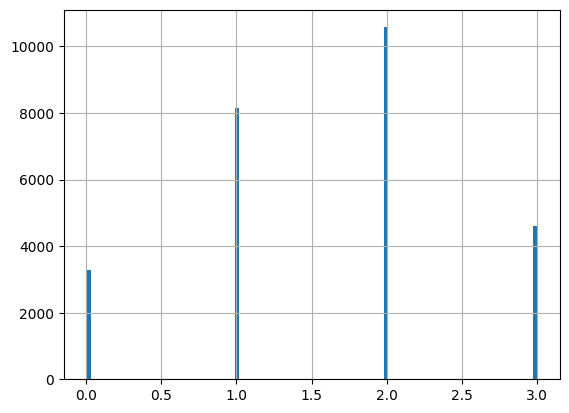

In [ ]:
df['h1n1_worry'].hist(bins=100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

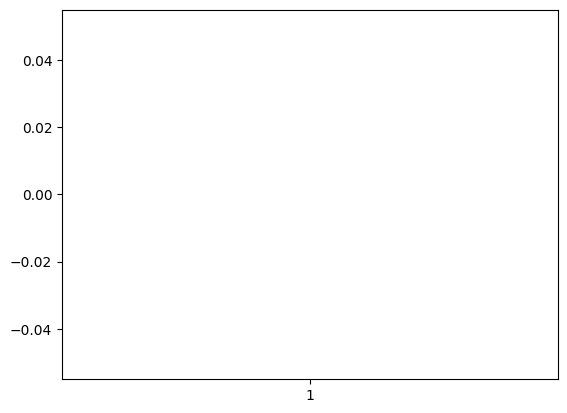

In [ ]:
plt.boxplot(df['h1n1_worry'])
plt.show()

Handling Null Values

In [ ]:
df['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [ ]:
df['h1n1_worry'].mode()

0    2.0
Name: h1n1_worry, dtype: float64

In [ ]:
df['h1n1_worry'].median()

2.0

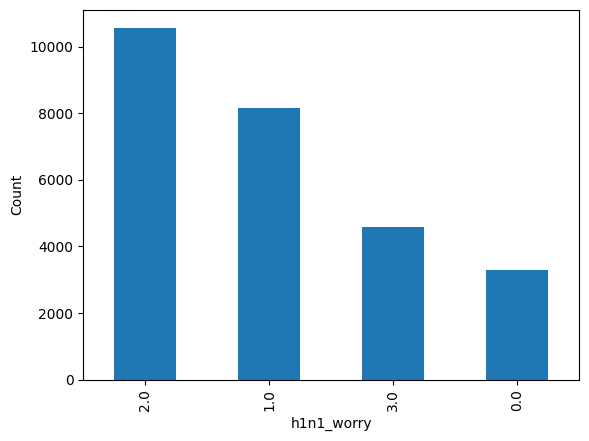

In [ ]:
df['h1n1_worry'].value_counts().plot(kind='bar')
plt.xlabel('h1n1_worry')
plt.ylabel('Count')
plt.show()

In [ ]:
df['h1n1_worry'].fillna(df['h1n1_worry'].mode()[0],inplace=True)

In [ ]:
df['h1n1_worry'].isnull().sum()

0

In [ ]:
df['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

In [ ]:
df['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [ ]:
df['h1n1_awareness'].median()

1.0

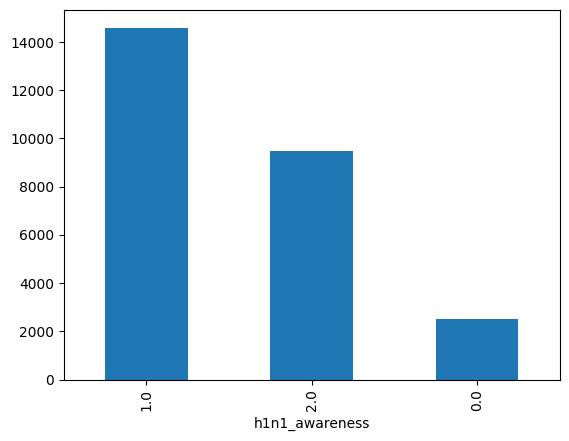

In [ ]:
df['h1n1_awareness'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['h1n1_awareness'].fillna(df['h1n1_awareness'].mode()[0],inplace=True)
df['h1n1_awareness'].isnull().sum()

0

In [ ]:
df['antiviral_medication'].unique()

array([ 0.,  1., nan])

In [ ]:
df['antiviral_medication'].mode()

0    0.0
Name: antiviral_medication, dtype: float64

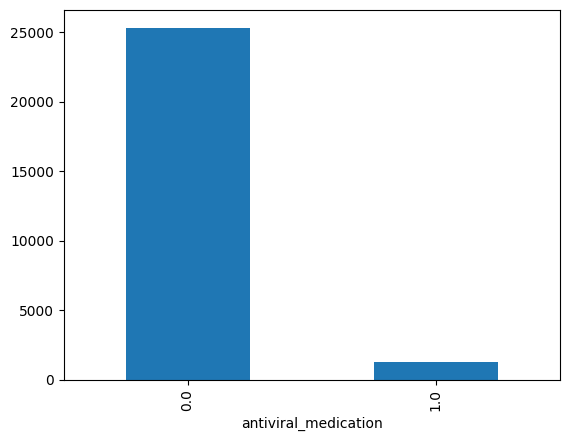

In [ ]:
df['antiviral_medication'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['antiviral_medication'].fillna(df['antiviral_medication'].mode()[0],inplace = True)
df['antiviral_medication'].unique()

array([0., 1.])

In [ ]:
df['antiviral_medication'].unique()

array([0., 1.])

In [ ]:
df['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [ ]:
df['contact_avoidance'].unique()

array([ 0.,  1., nan])

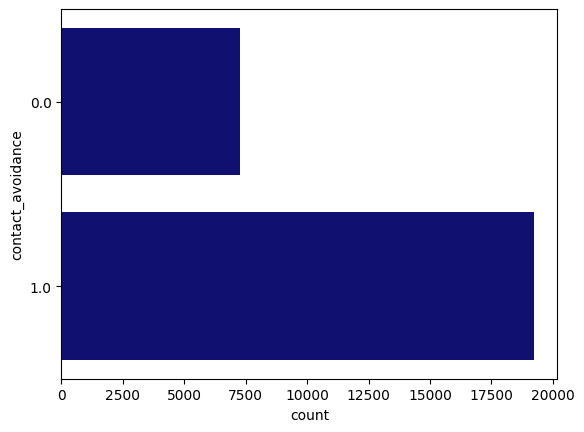

In [ ]:
sns.countplot(y = 'contact_avoidance', data = df, color = 'navy')
plt.show()

In [ ]:
df['contact_avoidance'].fillna(df['contact_avoidance'].mode()[0],inplace = True)
df['contact_avoidance'].unique()

array([0., 1.])

In [ ]:
df['bought_face_mask'].unique()

array([ 0.,  1., nan])

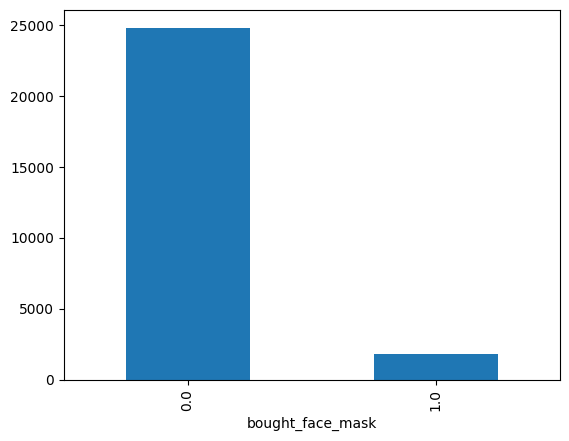

In [ ]:
df['bought_face_mask'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['bought_face_mask'].fillna(df['bought_face_mask'].mode()[0],inplace= True)
df['bought_face_mask'].unique()

array([0., 1.])

In [ ]:
df['wash_hands_frequently'].unique()

array([ 0.,  1., nan])

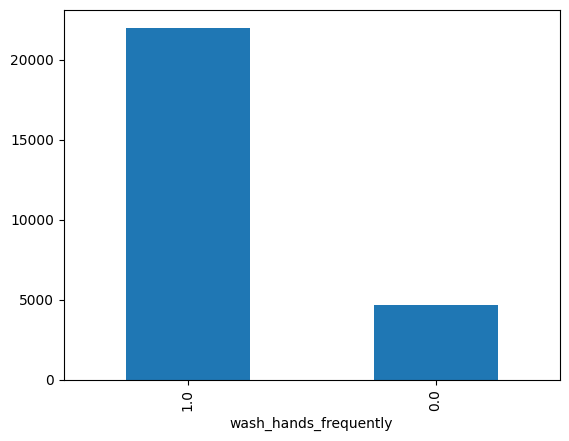

In [ ]:
df['wash_hands_frequently'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].mode()[0],inplace=True)
df['wash_hands_frequently'].unique()

array([0., 1.])

In [ ]:
df['avoid_large_gatherings'].unique()

array([ 0.,  1., nan])

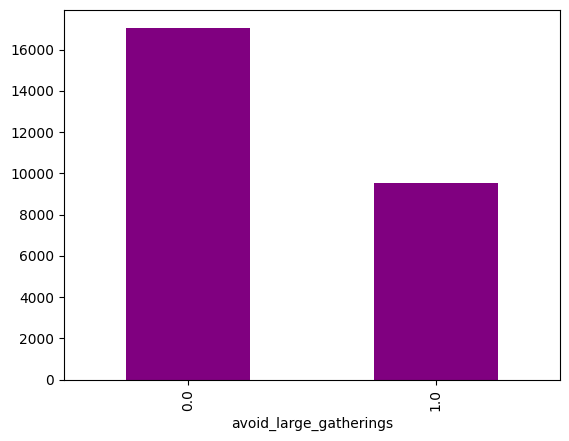

In [ ]:
df['avoid_large_gatherings'].value_counts().plot(kind='bar',color='purple')
plt.show()

In [ ]:
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].mode()[0],inplace=True)
df['avoid_large_gatherings'].unique()

array([0., 1.])

In [ ]:
df['reduced_outside_home_cont'].unique()

array([ 1.,  0., nan])

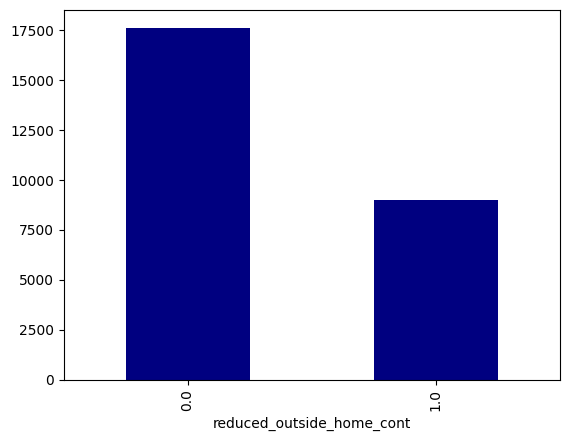

In [ ]:
df['reduced_outside_home_cont'].value_counts().plot(kind='bar',color='navy')
plt.show()

In [ ]:
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].mode()[0],inplace=True)
df['reduced_outside_home_cont'].unique()

array([1., 0.])

In [ ]:
df['avoid_touch_face'].unique()

array([ 1.,  0., nan])

In [ ]:
df['avoid_touch_face'].value_counts()

avoid_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64

In [ ]:
df['avoid_touch_face'].fillna(df['avoid_touch_face'].mode()[0], inplace = True)
df['avoid_touch_face'].unique()

array([1., 0.])

In [ ]:
df['dr_recc_h1n1_vacc'].unique()

array([ 0., nan,  1.])

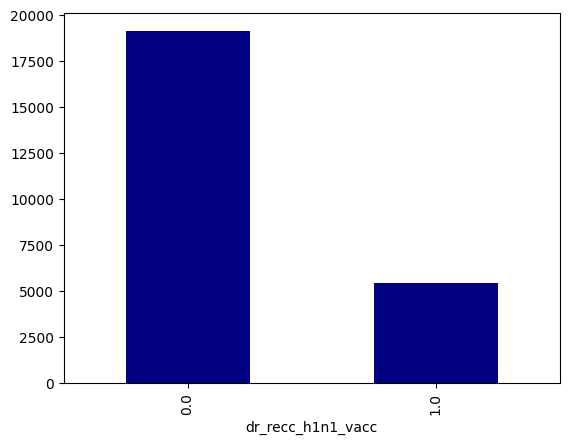

In [ ]:
df['dr_recc_h1n1_vacc'].value_counts().plot(kind='bar',color='navy')
plt.show()

In [ ]:
df['dr_recc_h1n1_vacc'].value_counts()

dr_recc_h1n1_vacc
0.0    19139
1.0     5408
Name: count, dtype: int64

In [ ]:
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_h1n1_vacc'].mode()[0],inplace=True)
df['dr_recc_h1n1_vacc'].isnull().sum()

0

In [ ]:
df['dr_recc_seasonal_vacc'].unique()

array([ 0., nan,  1.])

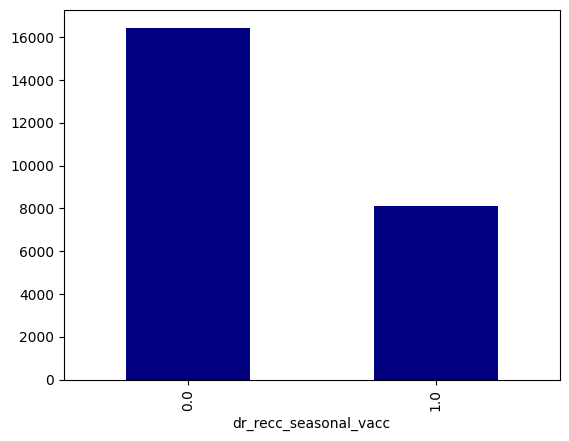

In [ ]:
df['dr_recc_seasonal_vacc'].value_counts().plot(kind='bar',color='navy')
plt.show()

In [ ]:
df['dr_recc_seasonal_vacc'].value_counts()

dr_recc_seasonal_vacc
0.0    16453
1.0     8094
Name: count, dtype: int64

In [ ]:
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_h1n1_vacc'].mode()[0],inplace=True)
df['dr_recc_seasonal_vacc'].isnull().sum()

0

In [ ]:
df['chronic_medic_condition'].unique()

array([ 0.,  1., nan])

In [ ]:
df['chronic_medic_condition'].value_counts()

chronic_medic_condition
0.0    18446
1.0     7290
Name: count, dtype: int64

In [ ]:
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].mode()[0],inplace=True)
df['chronic_medic_condition'].isnull().sum()

0

In [ ]:
df['cont_child_undr_6_mnths'].unique()

array([ 0.,  1., nan])

In [ ]:
df['cont_child_undr_6_mnths'].value_counts()

cont_child_undr_6_mnths
0.0    23749
1.0     2138
Name: count, dtype: int64

In [ ]:
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].mode()[0],inplace=True)
df['cont_child_undr_6_mnths'].isnull().sum()

0

In [ ]:
df['is_health_worker'].unique()

array([ 0.,  1., nan])

In [ ]:
df['is_health_worker'].value_counts()

is_health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64

In [ ]:
df['is_health_worker'].fillna(df['is_health_worker'].mode()[0],inplace=True)
df['is_health_worker'].isnull().sum()

0

In [ ]:
display(df['is_h1n1_vacc_effective'].unique(),df['is_seas_vacc_effective'].unique())

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

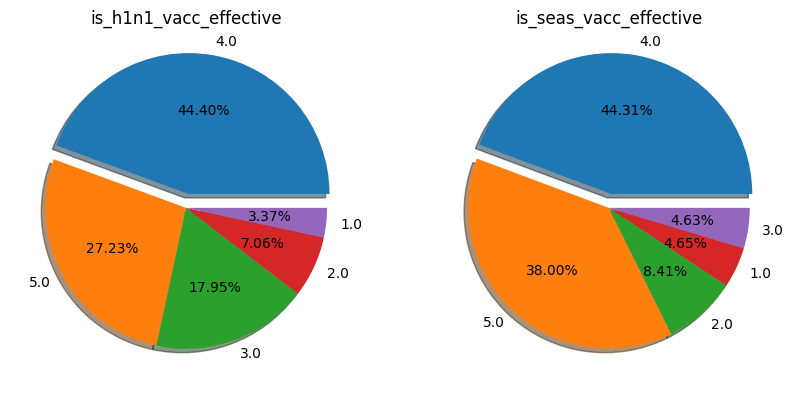

In [ ]:
fig, (ve1,ve2) = plt.subplots(1,2, figsize = [10,10])

ve1.pie(df['is_h1n1_vacc_effective'].value_counts(), labels = df['is_h1n1_vacc_effective'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], shadow = True)

ve2.pie(df['is_seas_vacc_effective'].value_counts(), labels = df['is_seas_vacc_effective'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], shadow = True)

ve1.set_title('is_h1n1_vacc_effective')
ve2.set_title('is_seas_vacc_effective')

plt.show()

In [ ]:
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].mode()[0], inplace = True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].mode()[0], inplace = True)

In [ ]:
display(df['is_h1n1_risky'].unique(),df['is_seas_risky'].unique())

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

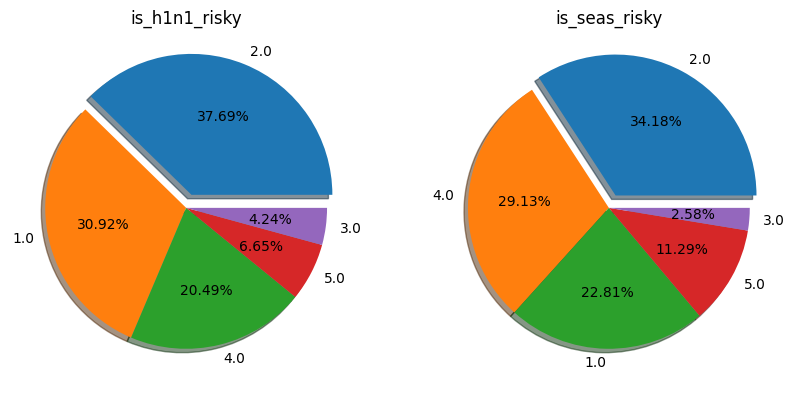

In [ ]:
fig, (r1,r2) = plt.subplots(1,2, figsize = [10,10])

r1.pie(df['is_h1n1_risky'].value_counts(), labels = df['is_h1n1_risky'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], shadow = True)

r2.pie(df['is_seas_risky'].value_counts(), labels = df['is_seas_risky'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], shadow = True)

r1.set_title('is_h1n1_risky')
r2.set_title('is_seas_risky')

plt.show()

In [ ]:
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].mode()[0], inplace = True)
df['is_seas_risky'].fillna(df['is_seas_risky'].mode()[0], inplace = True)

In [ ]:
display(df['sick_from_h1n1_vacc'].unique(),df['sick_from_seas_vacc'].unique())

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

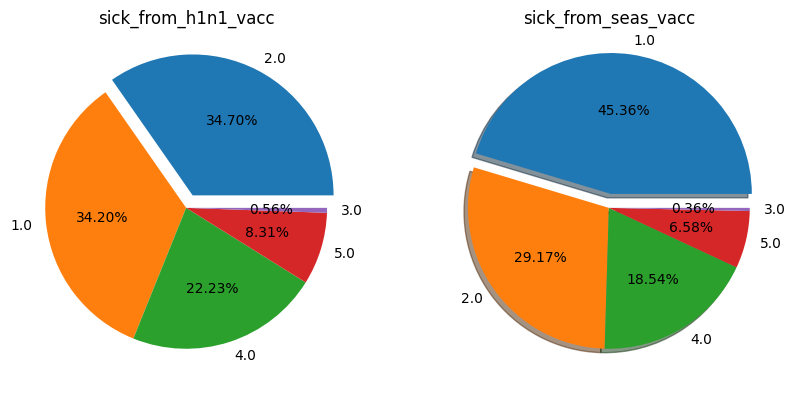

In [ ]:
fig, (sv1,sv2) = plt.subplots(1,2, figsize = [10,10])

sv1.pie(df['sick_from_h1n1_vacc'].value_counts(), labels = df['sick_from_h1n1_vacc'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0])

sv2.pie(df['sick_from_seas_vacc'].value_counts(), labels = df['sick_from_seas_vacc'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], shadow = True)

sv1.set_title('sick_from_h1n1_vacc')
sv2.set_title('sick_from_seas_vacc')

plt.show()

In [ ]:
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].mode()[0], inplace = True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].mode()[0], inplace = True)

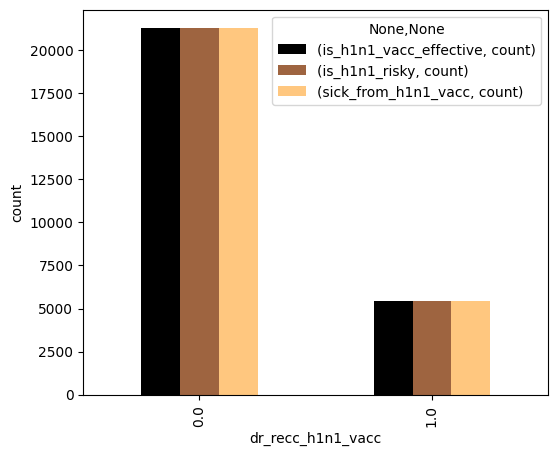

In [ ]:
df.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'copper', figsize = [6,5])
plt.ylabel('count')
plt.show()

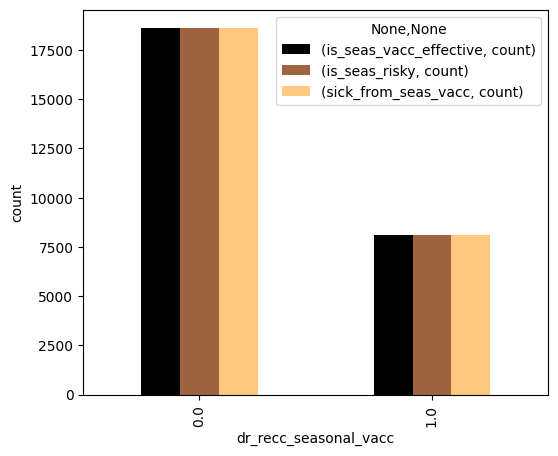

In [ ]:
df.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'copper', figsize = [6,5])
plt.ylabel('count')
plt.show()

In [ ]:
df['no_of_adults'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

<Axes: xlabel='qualification'>

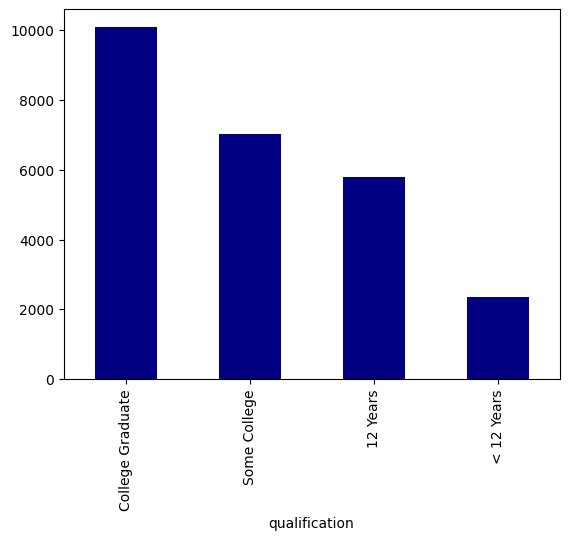

In [ ]:
df['qualification'].value_counts().plot(kind='bar',color='navy')

In [ ]:
df['qualification'].fillna(df['qualification'].mode()[0],inplace=True)
df['qualification'].isnull().sum()

0

In [ ]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

<Axes: ylabel='sex'>

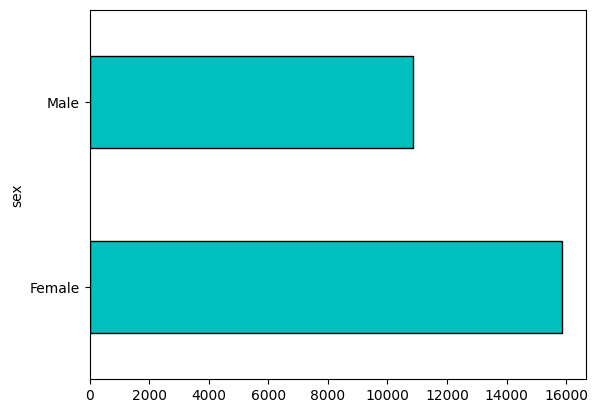

In [ ]:
df['sex'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'black')

In [ ]:
df['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<Axes: ylabel='count'>

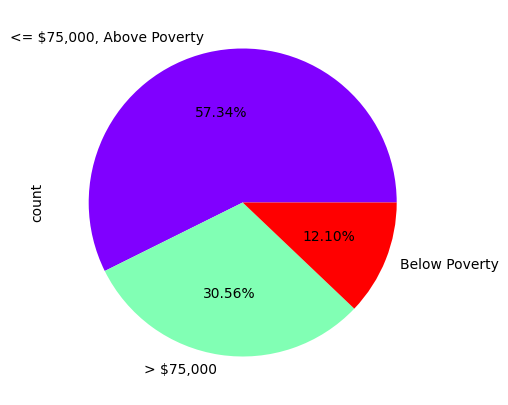

In [ ]:
df['income_level'].value_counts().plot(kind='pie',autopct = '%0.2f%%',figsize=[5,5],cmap='rainbow')

In [ ]:
df['income_level'].value_counts()

income_level
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [ ]:
#huge data are missing.So i put not declared to fill missing data.
df['income_level'].fillna('"Not declared',inplace = True)

In [ ]:
df['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

<Axes: ylabel='marital_status'>

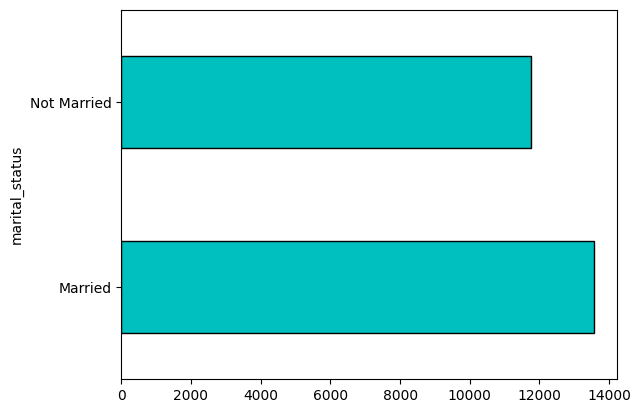

In [ ]:
df['marital_status'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'black')

In [ ]:
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace= True)
df['marital_status'].isnull().sum()

0

In [ ]:
df['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [ ]:
df['housing_status'].value_counts()

housing_status
Own     18736
Rent     5929
Name: count, dtype: int64

In [ ]:
df['housing_status'].fillna(df['housing_status'].mode()[0],inplace=True)
df['housing_status'].isnull().sum()

0

In [ ]:
df['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

<Axes: ylabel='count'>

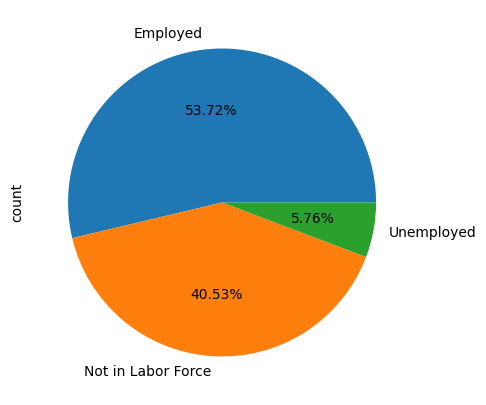

In [ ]:
df['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%',figsize = [5,5])

In [ ]:
df['employment'].fillna(df['employment'].mode()[0],inplace=True)
df['employment'].isnull().sum()

0

In [ ]:
df['no_of_adults'].unique()

array([ 0.,  2.,  1.,  3., nan])

<Axes: ylabel='no_of_adults'>

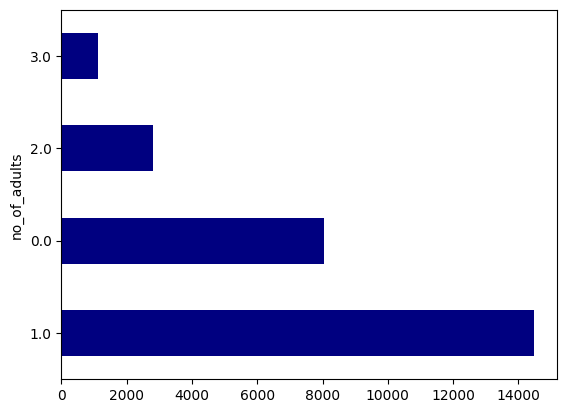

In [ ]:
df['no_of_adults'].value_counts().plot(kind='barh',color='navy')

In [ ]:
df['no_of_adults'].fillna(df['no_of_adults'].mode()[0],inplace=True)
df['no_of_adults'].isnull().sum()

0

In [ ]:
df['no_of_children'].unique()

array([ 0.,  3.,  2.,  1., nan])

<Axes: ylabel='no_of_children'>

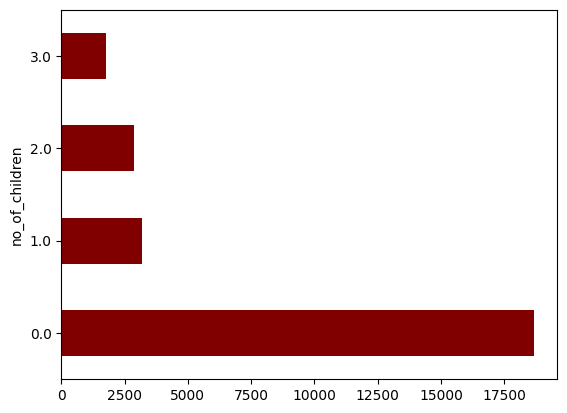

In [ ]:
df['no_of_children'].value_counts().plot(kind='barh',color='maroon')

In [ ]:
df['no_of_children'].fillna(df['no_of_children'].mode()[0],inplace=True)
df['no_of_children'].isnull().sum()

0

In [ ]:
df['has_health_insur'].unique()

array([ 1., nan,  0.])

In [ ]:
df['has_health_insur'].value_counts()

has_health_insur
1.0    12697
0.0     1736
Name: count, dtype: int64

In [ ]:
#more than 50% data are missing. so drop that column.
df = df.drop(columns=['has_health_insur'])

In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [ ]:
df=df.astype({'h1n1_worry':int, 'h1n1_awareness':int, 'antiviral_medication':int,'contact_avoidance':int, 'bought_face_mask':int,
              'wash_hands_frequently':int,'avoid_large_gatherings':int, 'reduced_outside_home_cont':int,'avoid_touch_face':int,
              'dr_recc_h1n1_vacc':int, 'dr_recc_seasonal_vacc':int,'chronic_medic_condition':int, 'cont_child_undr_6_mnths':int,
              'is_health_worker':int, 'is_h1n1_vacc_effective':int, 'is_h1n1_risky':int,'sick_from_h1n1_vacc':int,
              'is_seas_vacc_effective':int, 'is_seas_risky':int,'sick_from_seas_vacc':int, 'no_of_adults':int, 'no_of_children':int})

In [ ]:
df.dtypes.value_counts()

int64     24
object     9
Name: count, dtype: int64

In [ ]:
df.to_csv('vaccine.csv',index=False)

In [ ]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
#Encoding (categorical value convert to numerical value)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['age_bracket', 'qualification', 'race', 'sex','income_level', 'marital_status', 'housing_status','employment','census_msa']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

df.head()

In [ ]:
df['age_bracket'].unique()

In [ ]:
df.corr().h1n1_vaccine.sort_values()

In [ ]:
df.to_csv('vaccine.csv',index=False)